In [1]:
%run "../Notebooks/initialization.ipynb"
%run "../Notebooks/Input_selection_functions.ipynb"
%run "../Notebooks/Stitching_clean.ipynb"
%run "../Notebooks/Visualization_functions.ipynb"
%run "../Notebooks/Downsampling_and_outliers_functions.ipynb"
%load_ext autoreload

loading directory file
----------------------------------------
loaded variables from initialization file: 
> myparams, myconfiguration_file
> list_picked_id_source, list_picked_id_target
> data_folder
----------------------------------------


In this notebook we use combined methods from previous to get to a point in which we can compare the result we obtained with the model, either as point clouds either as meshes.

# THE MODEL

## load solid file in extension 

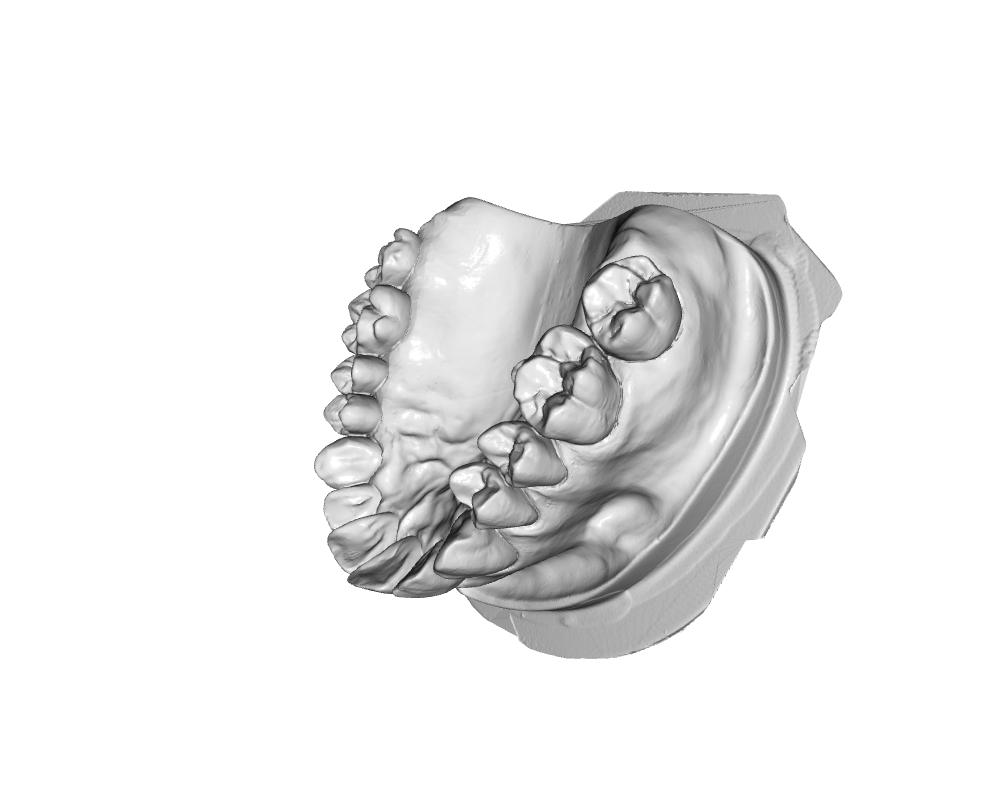

In [109]:
model_mesh = o3d.io.read_triangle_mesh("dental.stl")
model_mesh.compute_vertex_normals()
#o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)
custom_draw_geometry([model_mesh],
                     mytitle = "original model",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False)
Im(filename=last_file(".png"),
  width = 600, height = 400) 

## convert it to point cloud

In [110]:
pcd = o3d.geometry.PointCloud()
pcd.points = model_mesh.vertices
pcd.colors = model_mesh.vertex_colors
pcd.normals = model_mesh.vertex_normals

## visualize it 

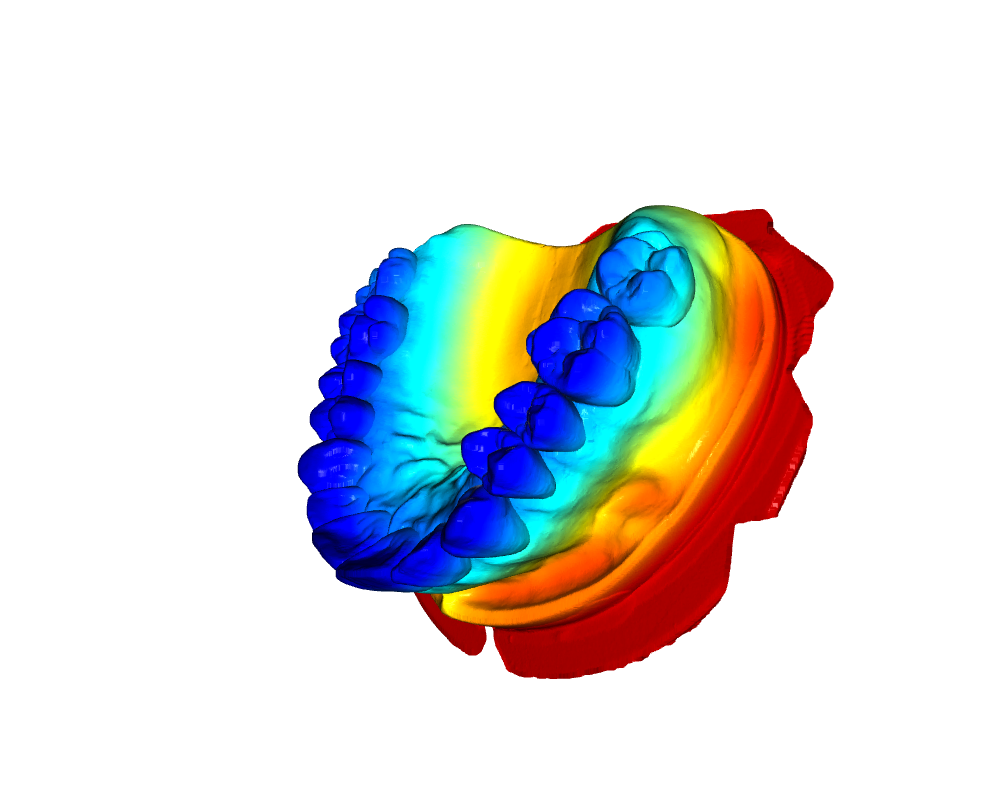

In [111]:
custom_draw_geometry(pcd,
                     mytitle = "original model",
                     #params = myparams,  # parameter for camera point view, json file via pressing P
                     #configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False)
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [112]:
pcd.points

std::vector<Eigen::Vector3d> with 3379896 elements.
Use numpy.asarray() to access data.

# OUR RESULTS

we can use either the mesh, which is elaborated, or the last pointcloud after cluster removal.

PointCloud with 528615 points.


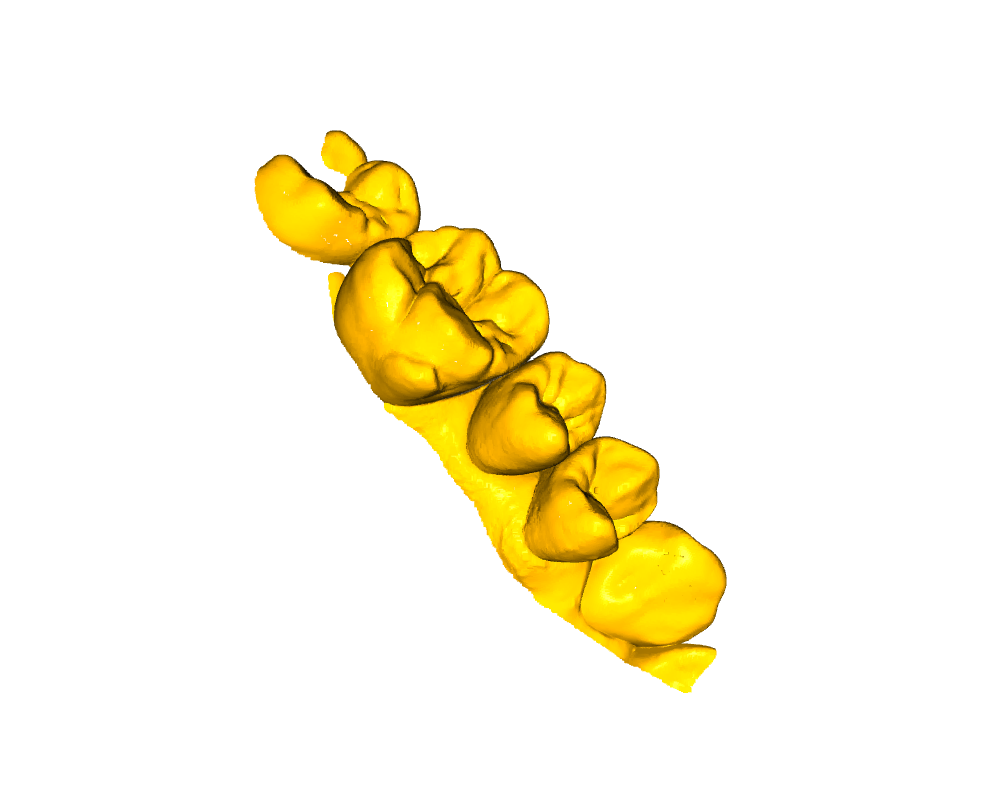

In [3]:
# LOAD MODEL CROPPED
last_model_cropped = o3d.io.read_point_cloud(
                                            last_file_containing("model_cropped", extension = '.ply')
                                            )
print (last_model_cropped)
custom_draw_geometry(last_model_cropped,
                     mytitle = "Model cropped",
                     #params = myparams,  # parameter for camera point view, json file via pressing P
                     #configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [117]:
scale_factor = 1000
trans_scale = np.asarray([[scale_factor, 0.0, 0.0, 0.0], 
                             [0.0, scale_factor, 0.0, 0.0],
                             [0.0, 0.0, scale_factor, 0.0], 
                             [0.0, 0.0, 0.0, 1.0]])

temp_model_mesh = copy.deepcopy(model_mesh)
temp_model_mesh.transform(trans_scale)

TriangleMesh with 3379896 points and 1126632 triangles.

## load reconstructed point cloud

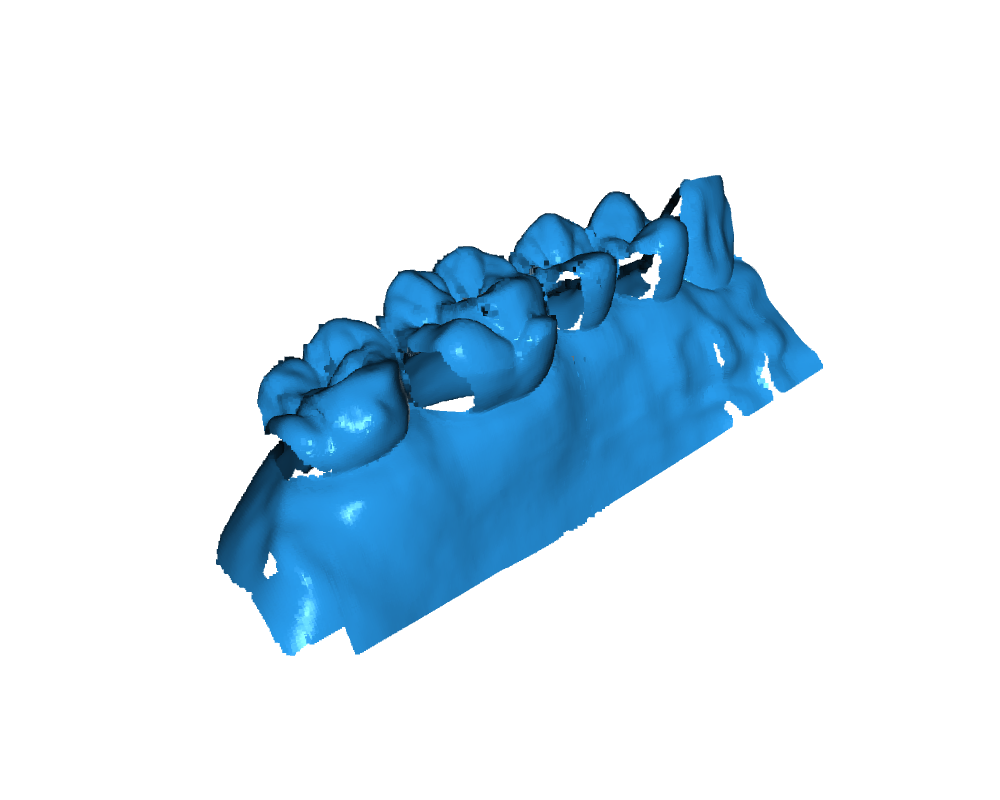

In [121]:
name = "complete_cluster_3.pcd"  #for cropped one. "cropped_6.ply"
st_pcd= o3d.io.read_point_cloud(name)
custom_draw_geometry(st_pcd,
                     mytitle = name[-4:],
                     #params = myparams,  # parameter for camera point view, json file via pressing P
                     #configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file(".png"),
  width = 500, height = 400) 

## alpha mesh

<class 'open3d.cpu.pybind.geometry.PointCloud'>
alpha=0.200
filter with average with 1 iteration


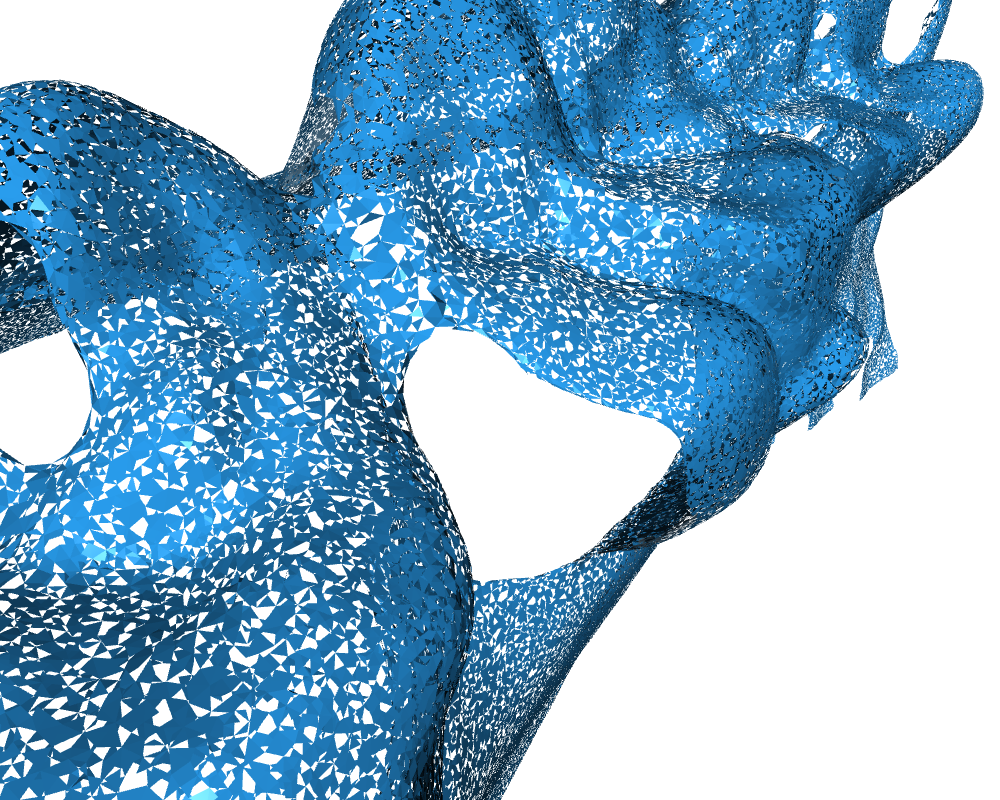

In [166]:
# mesh it!
print (type(st_pcd))

alpha = 0.2
print(f"alpha={alpha:.3f}")
reconstructed_mesh_alpha = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(st_pcd, alpha)
reconstructed_mesh_alpha.compute_vertex_normals()
o3d.visualization.draw_geometries([reconstructed_mesh_alpha], mesh_show_back_face=True)

#smooth it!
#this looks like the best
mesh_in = reconstructed_mesh_alpha
number_of_iterations = 5
print('filter with average with 1 iteration')
reconstructed_mesh_alpha_out = mesh_in.filter_smooth_simple(number_of_iterations=number_of_iterations)
reconstructed_mesh_alpha_out.compute_vertex_normals()
o3d.visualization.draw_geometries([reconstructed_mesh_out], mesh_show_back_face=True)

custom_draw_geometry(reconstructed_mesh_alpha_out,
                     mytitle = "reconstructed_mesh_alpha_out",
                     #params = myparams,  # parameter for camera point view, json file via pressing P
                     #configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file(".png"),
  width = 500, height = 400) 

## Poisson mesh

run Poisson surface reconstruction
[Open3D DEBUG] Input Points / Samples: 488502 / 1179
[Open3D DEBUG] #   Got kernel density: 0.000307798 (s), 1458.82 (MB) / 1929.13 (MB) / 2261 (MB)
[Open3D DEBUG] #     Got normal field: 0.00193000 (s), 1459.98 (MB) / 1929.13 (MB) / 2261 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 2.222399e-06 / 1.085646e+00
[Open3D DEBUG] #       Finalized tree: 0.00898385 (s), 1463.36 (MB) / 1929.13 (MB) / 2261 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.00917411 (s), 1463.36 (MB) / 1929.13 (MB) / 2261 (MB)
[Open3D DEBUG] #Set point constraints: 0.00141478 (s), 1463.36 (MB) / 1929.13 (MB) / 2261 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 58528 / 66888 / 1
[Open3D DEBUG] Memory Usage: 1463.363 MB
[Open3D DEBUG] # Linear system solved: 0.065213 (s), 1464.36 (MB) / 1929.13 (MB) / 2261 (MB)
[Open3D DEBUG] Got average: 0.00108695 (s), 1453.14 (MB) / 1929.13 (MB) / 2261 (MB)
[Open3D DEBUG] Iso-Value: 5.009404e-01 = 2.447104e+05 / 4.885020e+05
[

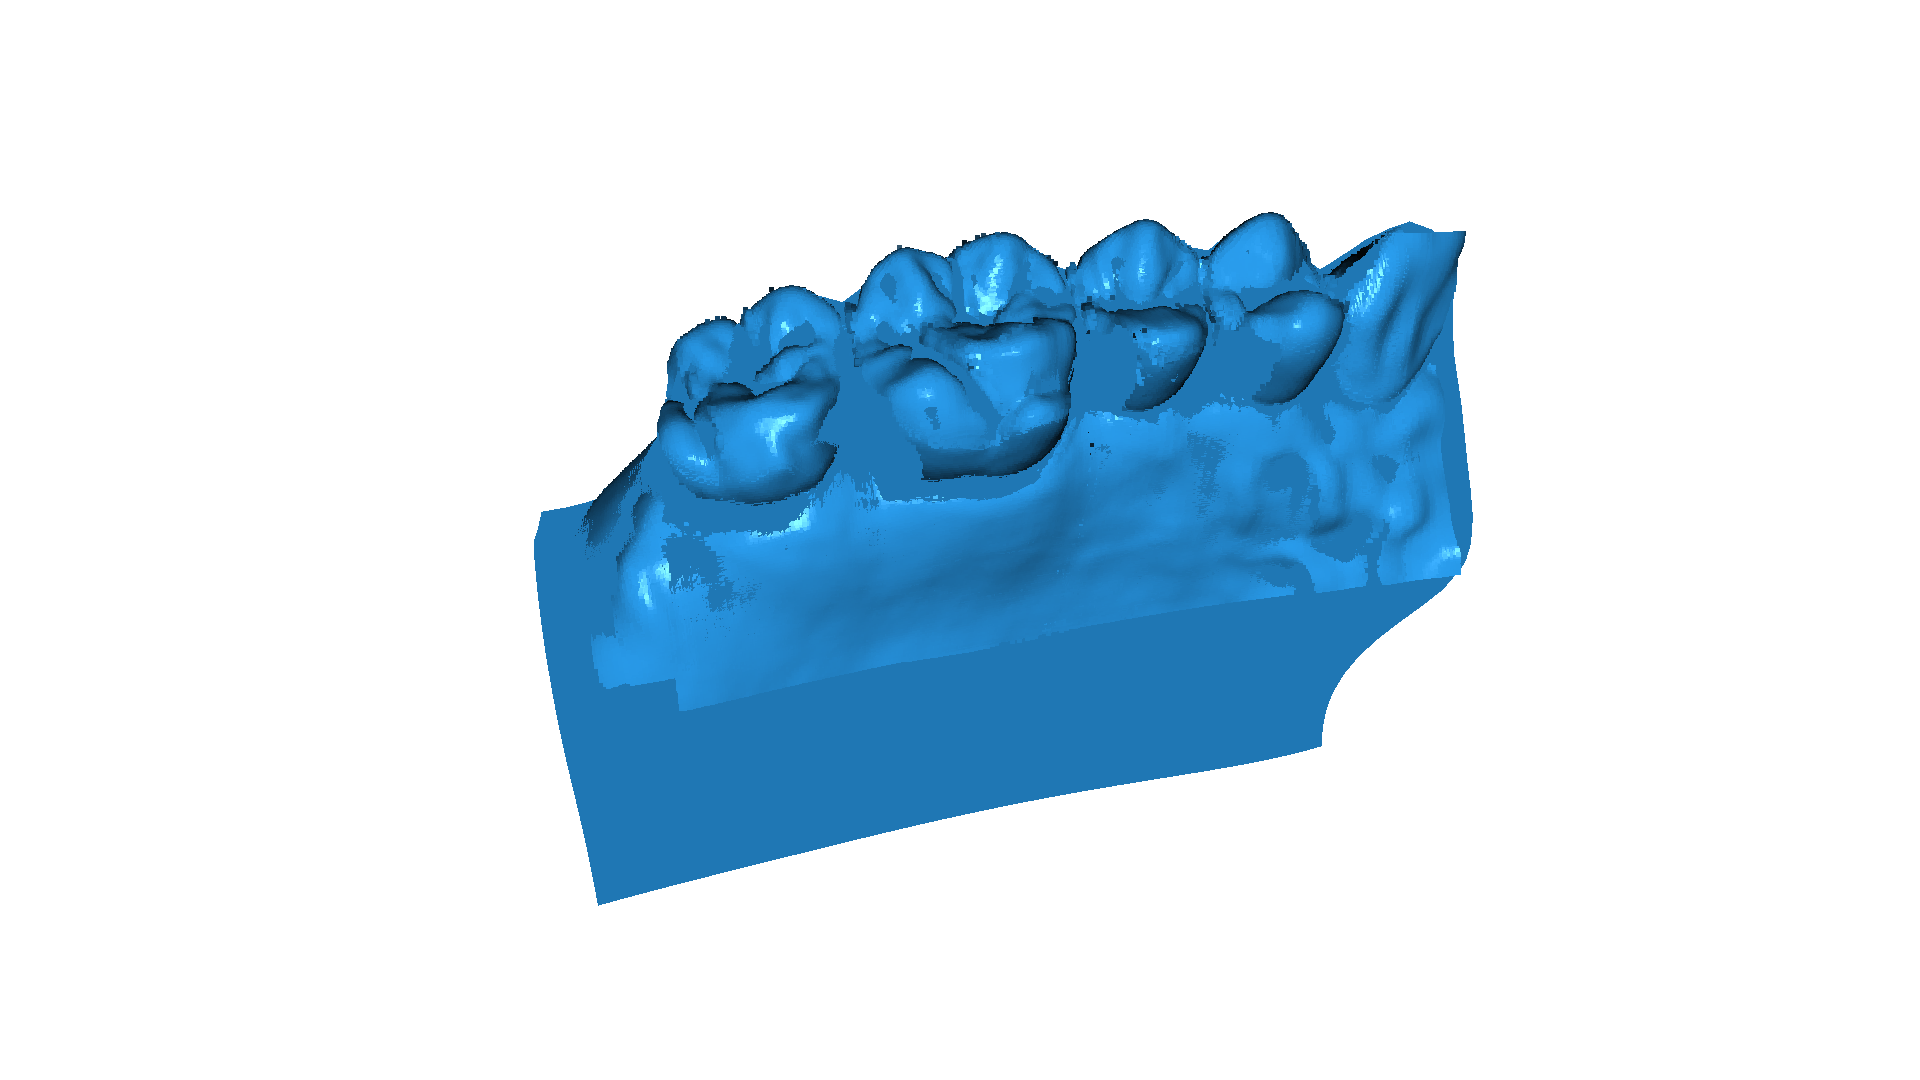

In [155]:
print('run Poisson surface reconstruction')
with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Debug) as cm:
    reconstructed_mesh_poisson, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(
                                                                                st_pcd, depth=5)
print(mesh)
o3d.visualization.draw_geometries([st_pcd,reconstructed_mesh_poisson], mesh_show_back_face=True)
Im(filename=last_file(".png"),
  width = 500, height = 400)

visualize densities


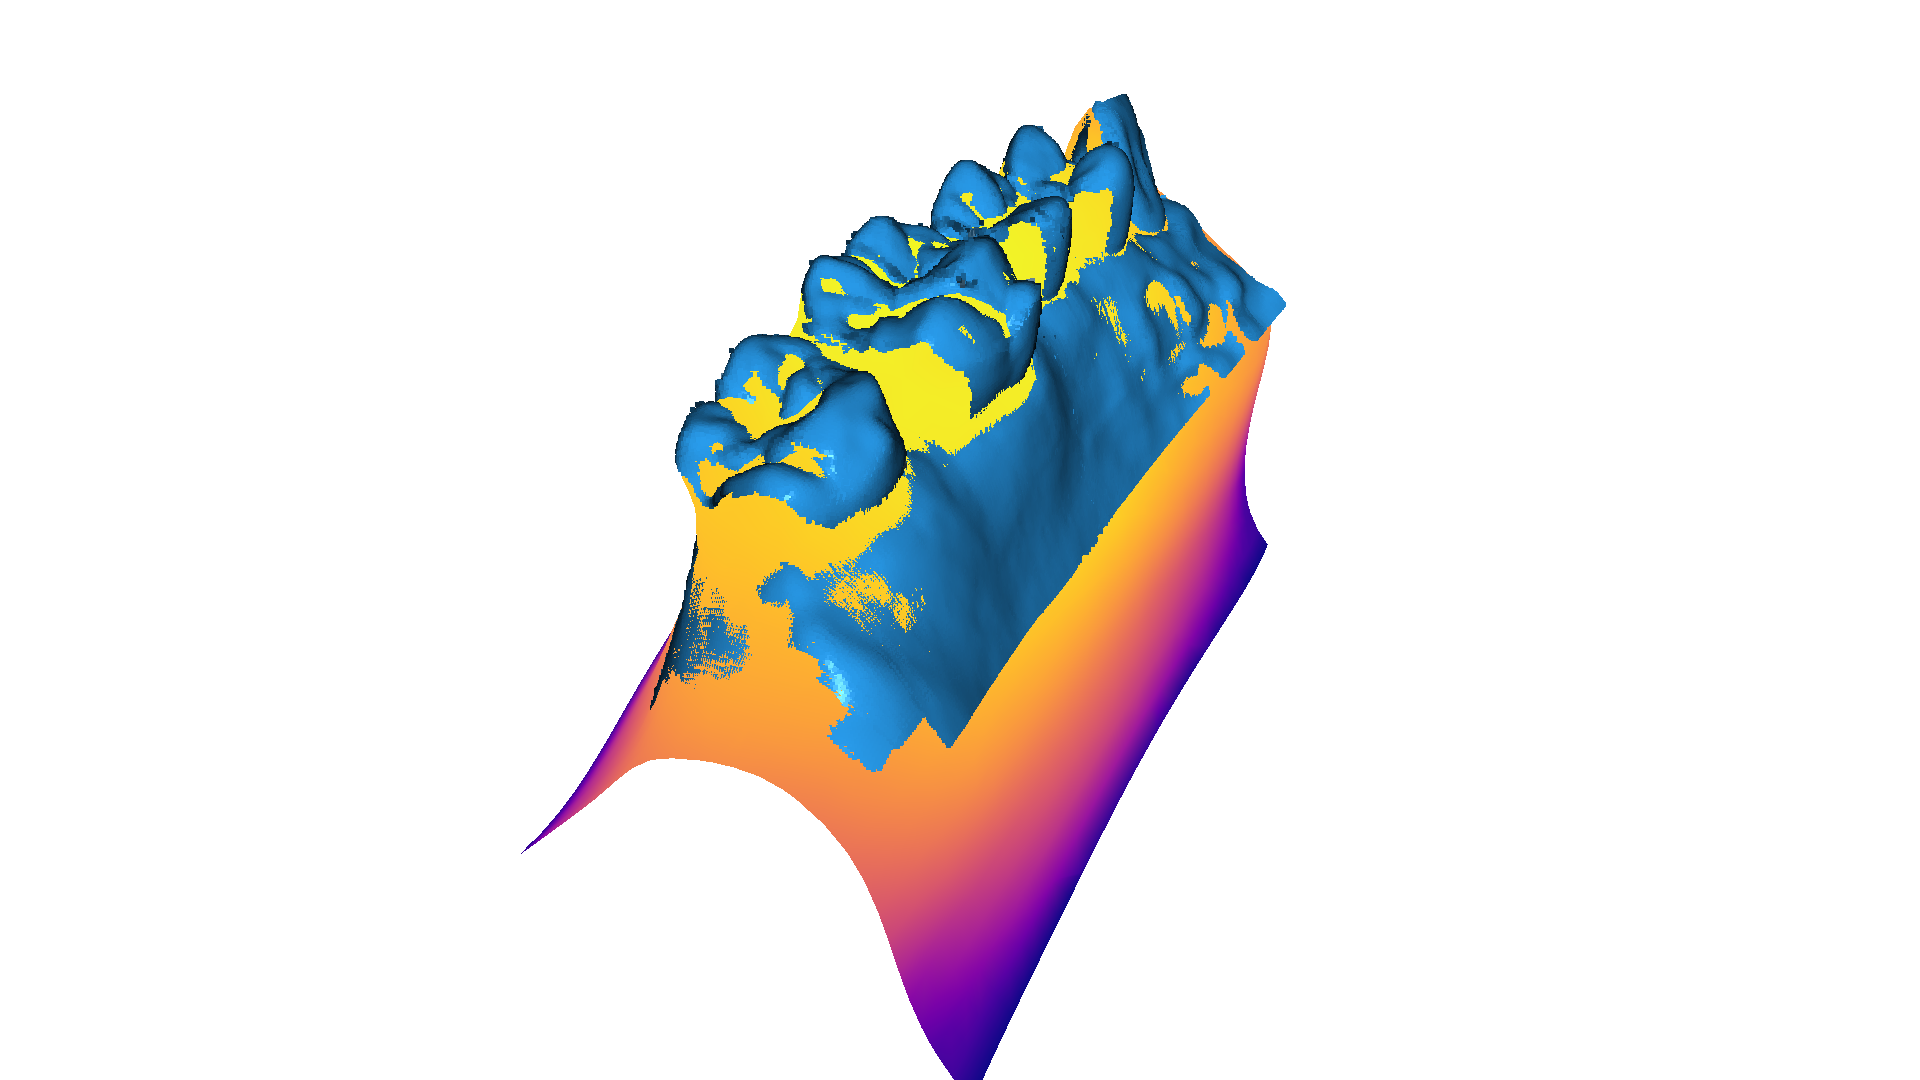

In [139]:
print('visualize densities')
densities = np.asarray(densities)
density_colors = plt.get_cmap('plasma')(
    (densities - densities.min()) / (densities.max() - densities.min()))
density_colors = density_colors[:, :3]

density_mesh = o3d.geometry.TriangleMesh()
density_mesh.vertices = reconstructed_mesh_poisson.vertices
density_mesh.triangles = reconstructed_mesh_poisson.triangles
density_mesh.triangle_normals = reconstructed_mesh_poisson.triangle_normals
density_mesh.vertex_colors = o3d.utility.Vector3dVector(density_colors)

o3d.visualization.draw_geometries([st_pcd,density_mesh], mesh_show_back_face=True)
Im(filename=last_file(".png"),
  width = 500, height = 400)

In [159]:
np.quantile(densities, 0.1)

4.182420730590821

In [160]:
np.quantile(densities, 0.05)

2.734410738945007

In [161]:
max(densities)

10.008193016052246

In [163]:
temp_reconstructed_mesh_poisson = copy.deepcopy(reconstructed_mesh_poisson)

print('remove low density vertices')
vertices_to_remove = densities < np.quantile(densities, 0.05)
temp_reconstructed_mesh_poisson.remove_vertices_by_mask(vertices_to_remove)
print(temp_reconstructed_mesh_poisson)

o3d.visualization.draw_geometries([st_pcd,temp_reconstructed_mesh_poisson], mesh_show_back_face=True)

remove low density vertices
TriangleMesh with 2139 points and 4107 triangles.


filter with Laplacian with 10 iterations


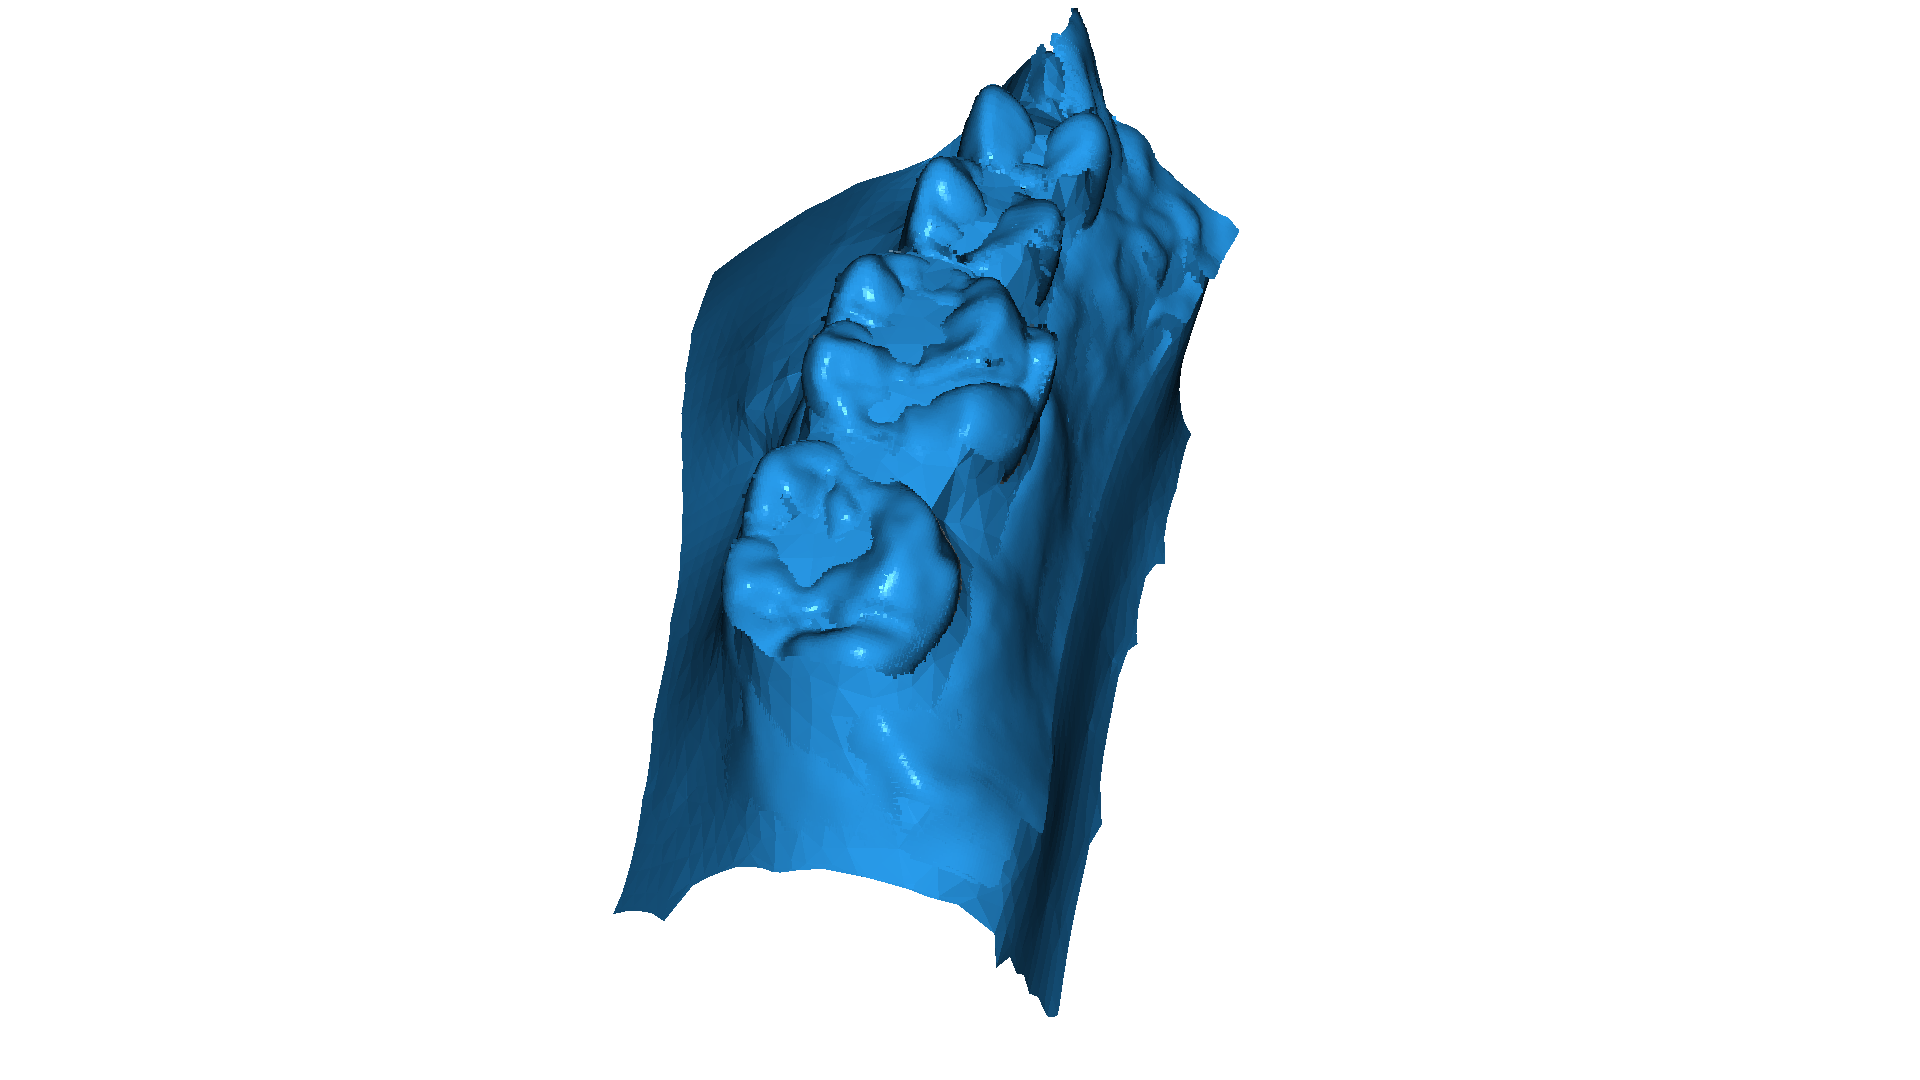

In [165]:
#smooth it!
#this looks like the best
mesh_in = reconstructed_mesh_poisson
number_of_iterations = 5
print('filter with Laplacian with 10 iterations')
mesh_out = mesh_in.filter_smooth_laplacian(number_of_iterations=10)
mesh_out.compute_vertex_normals()
o3d.visualization.draw_geometries([st_pcd,mesh_out],mesh_show_back_face=True)
Im(filename=last_file(".png"),
  width = 500, height = 400)

## compare meshes

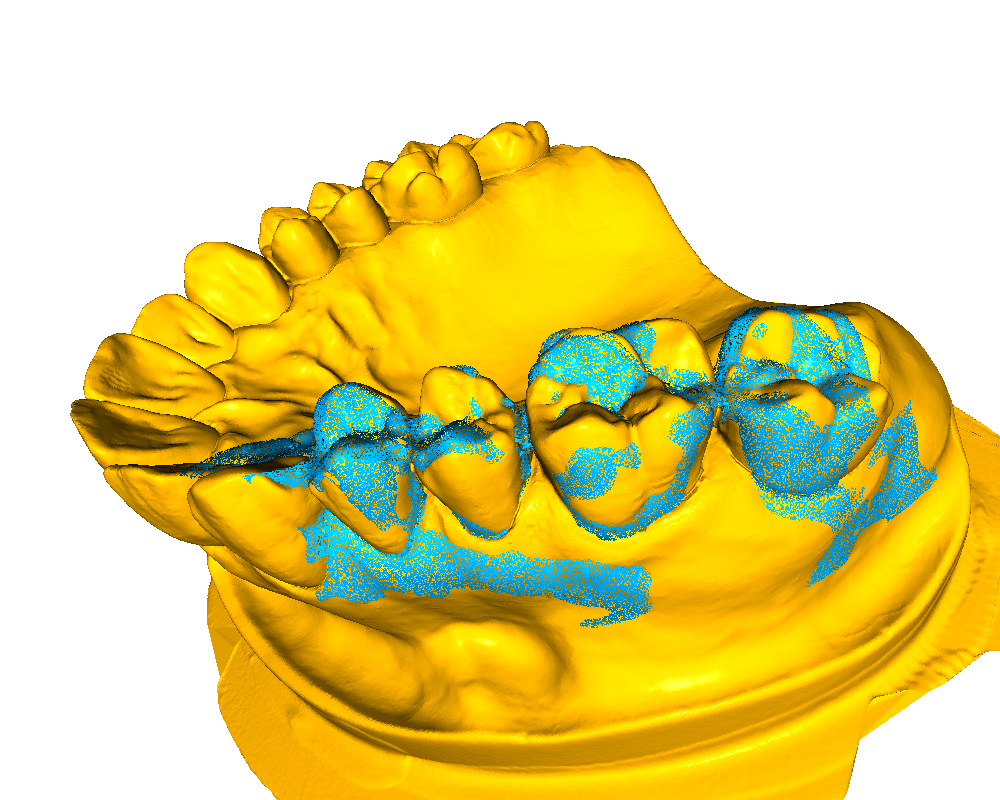

In [170]:
draw_registration_result(temp_model_mesh, reconstructed_mesh_out, 
                                 list_cool_transformations[-1],
                                 title = "comparemeshes"
                                 )


Im(filename=last_file("comparemeshes", extension= ".png"),
  width = 500, height = 400)

In [168]:
demo_crop_geometry(temp_model_mesh)

Demo for manual geometry cropping
1) Press 'Y' twice to align geometry with negative direction of y-axis
2) Press 'K' to lock screen and to switch to selection mode
3) Drag for rectangle selection,
   or use ctrl + left click for polygon selection
4) Press 'C' to get a selected geometry and to save it
5) Press 'F' to switch to freeview mode
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.


## compare point clouds

In [171]:
mesh_model_list_stitches = [last_model_cropped,aftermesh_st_pcd]
mesh_model_lables = ["mesh_model_pc","stitched_pc"]

In [ ]:
transf,new_picked_id_source,new_picked_id_target,registration,list_stitches = full_evaluation_pipeline(
                                                                             #input 
                                                                             list_stitches = mesh_model_list_stitches,
                                                                             labels_stitches = mesh_model_lables,
                                                                             color_stitches = [[1, 0.706, 0],[0, 0.651, 0.929]],

                                                                             #plotting 
                                                                             params = myparams,  # parameter for camera point view, json file via pressing P
                                                                             configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                                                                             take_screen_shot = True,
                                                                             rotate = False,
                                                                             onewindow = True,

                                                                             #scaling
                                                                             scale_factor = 1000,
                                                                             voxels = [0.1,0.2],

                                                                             #evaluation 
                                                                             threshold = 0.03,
                                                                             picked_id_source = list_picked_id_source[0],
                                                                             picked_id_target = list_picked_id_target[0],

                                                                             #statements
                                                                             print_statements = True,
                                                                             visualization_on = True
                                                                            )

(255, 180.03, 0)
(0, 166.005, 236.895)


In [ ]:
Im(filename=last_file(".png"),
  width = 500, height = 400) 

## Pointcloud as input -without further enhancements (meshin etc)
Manual - DONE

Make a function - DONE needs testing 

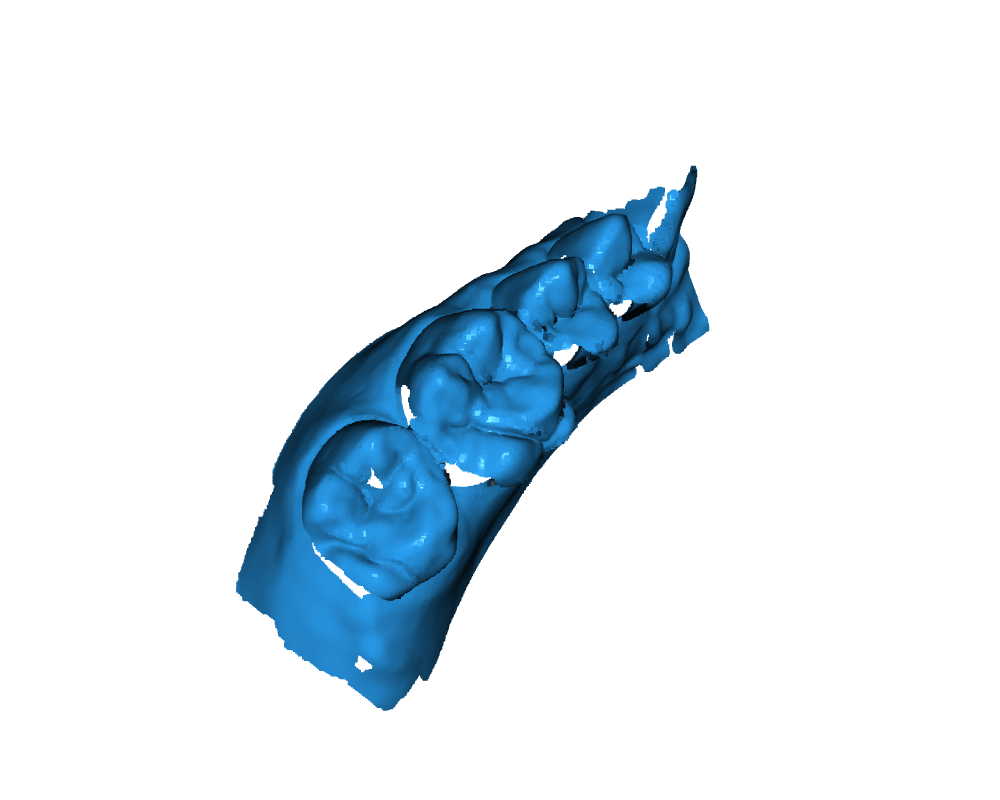

In [4]:
st_pcd= o3d.io.read_point_cloud("complete_cluster_3.pcd")
custom_draw_geometry(st_pcd,
                     mytitle = "complete_cluster_3",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [78]:
demo_crop_geometry(st_pcd)

Demo for manual geometry cropping
1) Press 'Y' twice to align geometry with negative direction of y-axis
2) Press 'K' to lock screen and to switch to selection mode
3) Drag for rectangle selection,
   or use ctrl + left click for polygon selection
4) Press 'C' to get a selected geometry and to save it
5) Press 'F' to switch to freeview mode
[Open3D INFO] No point has been picked.


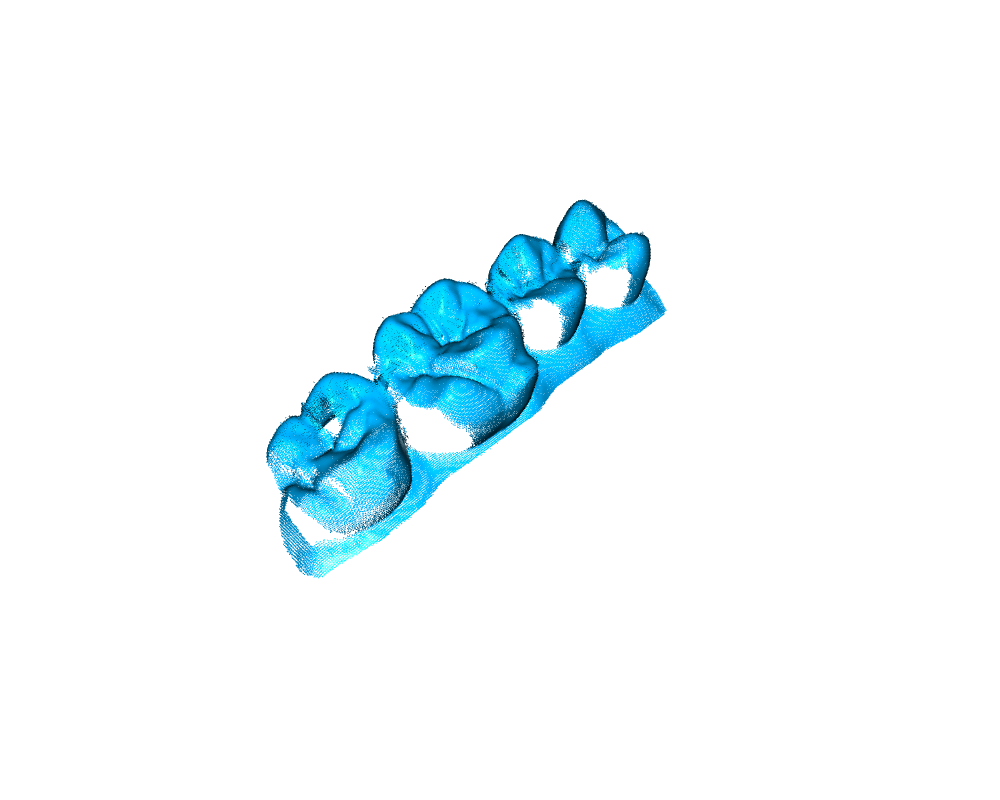

In [79]:
st_pcd= o3d.io.read_point_cloud("st_cropped_2.ply")
custom_draw_geometry(st_pcd,
                     mytitle = "complete_cluster_3",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [5]:
model_list_stitches = [last_model_cropped,st_pcd]
model_lables = ["model_pc","stitched_pc"]

In [16]:
transf,new_picked_id_source,new_picked_id_target,registration,list_stitches = full_evaluation_pipeline(
                                                                             #input 
                                                                             list_stitches = model_list_stitches,
                                                                             labels_stitches = model_lables,
                                                                             color_stitches = [[1, 0.706, 0],[0, 0.651, 0.929]],

                                                                             #plotting 
                                                                             params = myparams,  # parameter for camera point view, json file via pressing P
                                                                             configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                                                                             take_screen_shot = True,
                                                                             rotate = False,
                                                                             onewindow = True,

                                                                             #scaling
                                                                             scale_factor = 1000,
                                                                             voxels = [0.1,0.2],

                                                                             #evaluation 
                                                                             threshold = 0.03,
                                                                             picked_id_source = list_picked_id_source[0],
                                                                             picked_id_target = list_picked_id_target[0],

                                                                             #statements
                                                                             print_statements = True,
                                                                             visualization_on = True
                                                                            )

(255, 180.03, 0)
(0, 166.005, 236.895)
51851
39452
[25232, 44649, 5280]
RegistrationResult with fitness=2.179322e-03, inlier_rmse=2.225832e-02, and correspondence_set size of 113
Access transformation to get result.


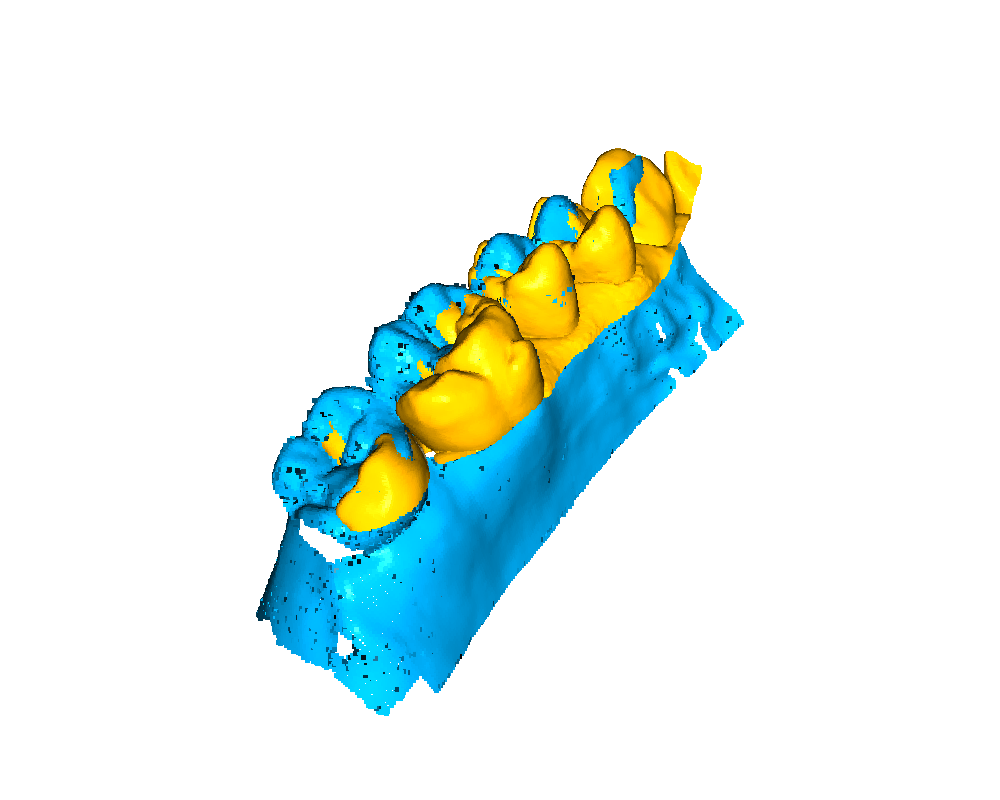

In [8]:
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [40]:
## create list of improving transformations 

#list_cool_transformations = []


In [19]:
# number of point clouds
get_num_points(list_stitches, print_statement = True)



number of points in clouds
(0, 528615)
(1, 488502)


[528615, 488502]

In [17]:
draw_registration_result(list_stitches[0], list_stitches[1], transf)

In [41]:
list_cool_transformations.append(transf)

## improve alignment

After getting an approximate solution with the manual alignment, we feed the found transformation in further icp. 

In [72]:
source = copy.deepcopy(list_stitches[0])
target =  copy.deepcopy(list_stitches[1])
source.points

std::vector<Eigen::Vector3d> with 528615 elements.
Use numpy.asarray() to access data.

In [73]:
source = source.voxel_down_sample(voxel_size=0.0001)
source.points

std::vector<Eigen::Vector3d> with 88097 elements.
Use numpy.asarray() to access data.

In [74]:
target = target.voxel_down_sample(voxel_size=0.1
                                 )
target.points

std::vector<Eigen::Vector3d> with 137372 elements.
Use numpy.asarray() to access data.

In [56]:
processed_source, outlier_index_source = source.remove_radius_outlier(
                                              nb_points=16,
                                              radius=0.45)

processed_target, outlier_index_target = target.remove_radius_outlier(
                                              nb_points=16,
                                              radius=0.5)

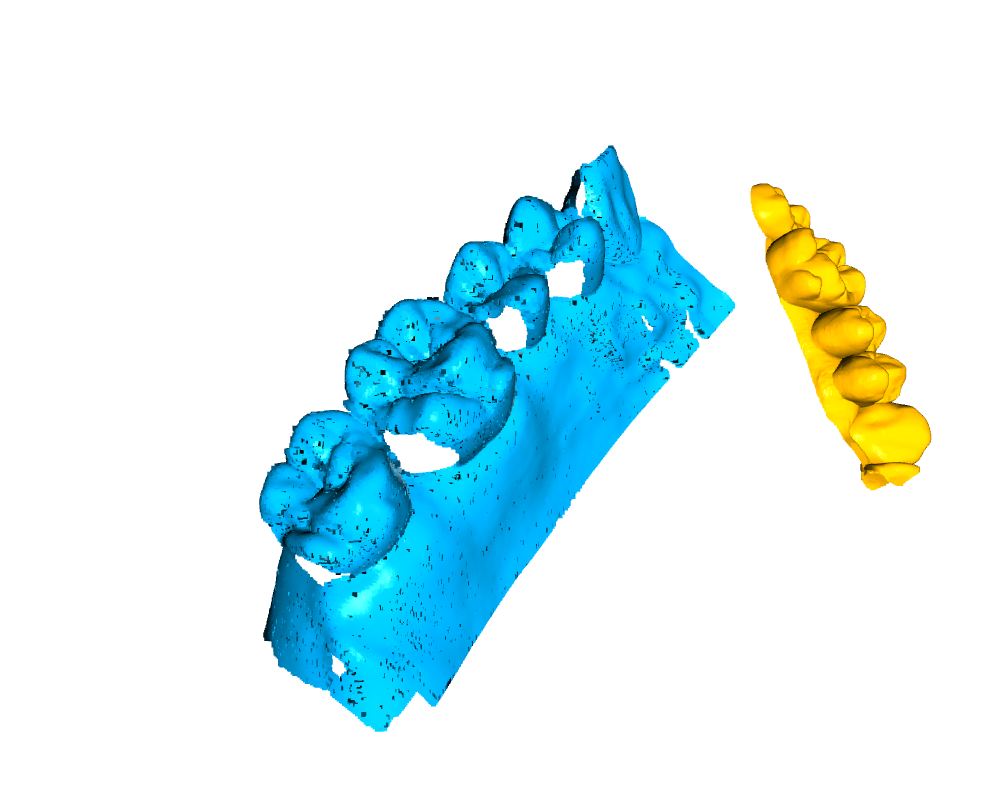

In [75]:
custom_draw_geometry(source+target,
                     mytitle = "processed",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [82]:
# ICP

new_source, new_target, source_down, target_down, source_fpfh, target_fpfh,trans_init = prepare_dataset(processed_source,
                                                                                                 processed_target,
                                                                                                 voxel_size=0.1, 
                                                                                                 #trans_init,
                                                                                                 mytitle ="",
                                                                                                 print_statements = True
                                                                                         )

result_icp = refine_registration(new_source, new_target, 
                                                 source_fpfh, target_fpfh,
                                                 voxel_size=0.1,
                                                 mytranformation =list_cool_transformations[-1],
                                                 print_statements = True
                                                )

overlapping_points = result_icp.correspondence_set

get_num_points([new_source, new_target],True)

print("Transformation is:")
print(result_icp.transformation)
print ("overlapping points : " ,len(np.asarray(overlapping_points)))
print (result_icp)

draw_registration_result(new_source, new_target, 
                                 result_icp.transformation,
                                 title = "icp registration"
                                 )

list_cool_transformations.append(result_icp.transformation)

removing outliers

POINT-TO-PLANE ICP registration is applied on original point
distance threshold 0.200.


number of points in clouds
(0, 51840)
(1, 137355)
Transformation is:
[[ -0.42597111   0.89752857  -0.11397839  18.81142039]
 [ -0.7280142   -0.41483211  -0.54581099  -4.53173302]
 [ -0.53716286  -0.14952182   0.83012005 -14.81362084]
 [  0.           0.           0.           1.        ]]
overlapping points :  23117
RegistrationResult with fitness=4.459298e-01, inlier_rmse=1.140639e-01, and correspondence_set size of 23117
Access transformation to get result.


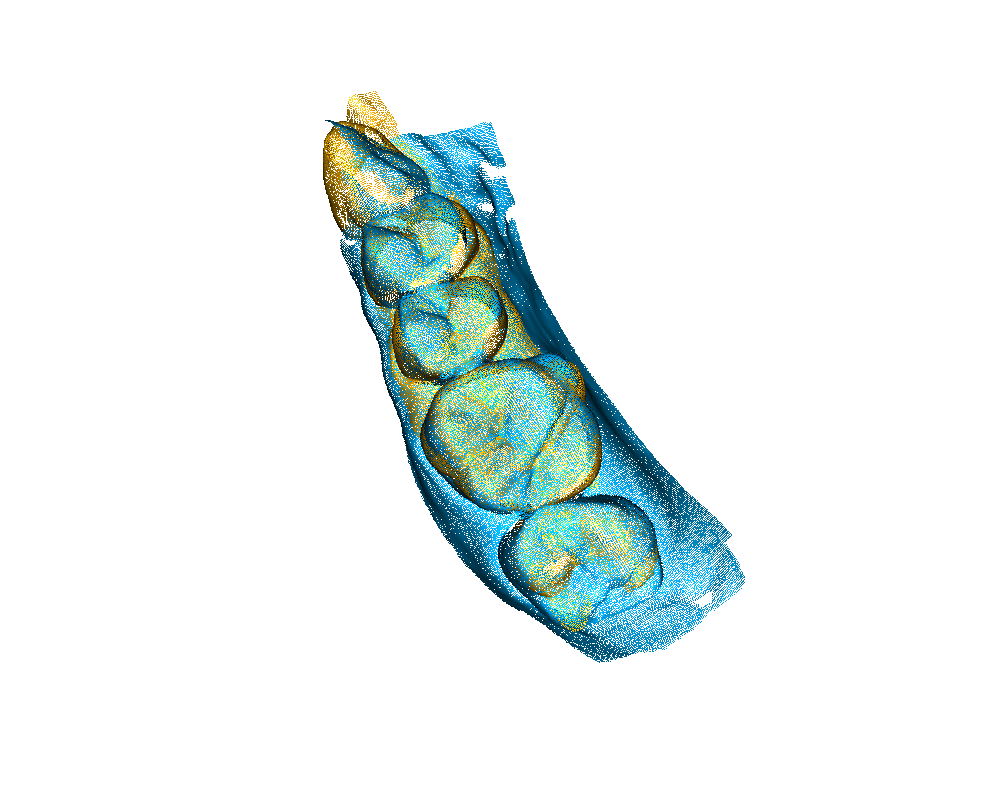

In [83]:
Im(filename=last_file(".png"),
  width = 500, height = 400) 

## good transformations 

In [85]:
list_cool_transformations

[array([[ -0.36535454,   0.92151115,  -0.13165587,  22.15045537],
        [ -0.49072739,  -0.31085269,  -0.81397619,  17.17282328],
        [ -0.79101371,  -0.23278276,   0.5657822 , -13.72684573],
        [  0.        ,   0.        ,   0.        ,   1.        ]]),
 array([[ -0.42326284,   0.89644163,  -0.13130489,  19.624528  ],
        [ -0.68868641,  -0.41250832,  -0.59627839,  -0.90217561],
        [ -0.58869313,  -0.16195459,   0.79196661, -15.19023725],
        [  0.        ,   0.        ,   0.        ,   1.        ]]),
 array([[ -0.42905356,   0.89505335,  -0.12162456,  19.01027892],
        [ -0.72035764,  -0.42028781,  -0.55176357,  -4.08155604],
        [ -0.54497515,  -0.14912295,   0.8250845 , -14.92106975],
        [  0.        ,   0.        ,   0.        ,   1.        ]]),
 array([[ -0.42828257,   0.89526032,  -0.12281289,  19.11879471],
        [ -0.73316709,  -0.42370821,  -0.53191858,  -5.45988451],
        [ -0.52824242,  -0.13776909,   0.83784224, -14.68829009],
    

In [92]:
list_cool_transformations = list_cool_transformations[:-1]

## result

In [4]:
#draw_registration_result(temp_pcd, st_pcd, transf)

#Im(filename=last_file(".png"),
  #width = 500, height = 400) 

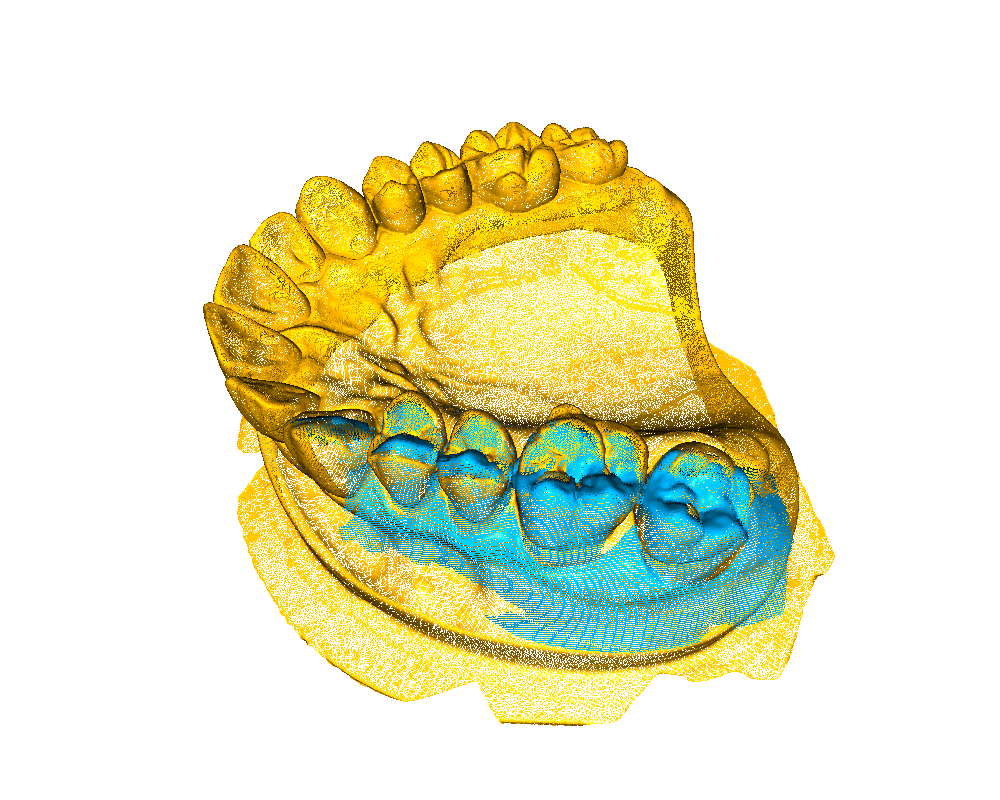

In [3]:
Im(filename=last_file("successfulmanualregistration.png"),
  width = 500, height = 400) 